In [9]:
import fsps
import numpy as np 
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
ssp = fsps.StellarPopulation(zcontinuous=1, sfh=0, imf_type=1)

In [3]:
ssp.libraries

(b'mist', b'miles', b'DL07  ')

In [4]:
# metallicity bins of the MIST isochrones
zlegend = np.array([4.49043431e-05, 1.42000001e-04, 2.52515678e-04, 4.49043431e-04,
       7.98524687e-04, 1.42000001e-03, 2.52515678e-03, 4.49043431e-03,
       7.98524687e-03, 1.42000001e-02, 2.52515678e-02, 4.49043431e-02])

In [8]:
np.log10(zlegend/0.0190)

array([-2.62646525, -2.12646525, -1.87646525, -1.62646525, -1.37646525,
       -1.12646525, -0.87646525, -0.62646525, -0.37646525, -0.12646525,
        0.12353475,  0.37353475])

Text(0.5, 0, 'wavelength ($AA$)')

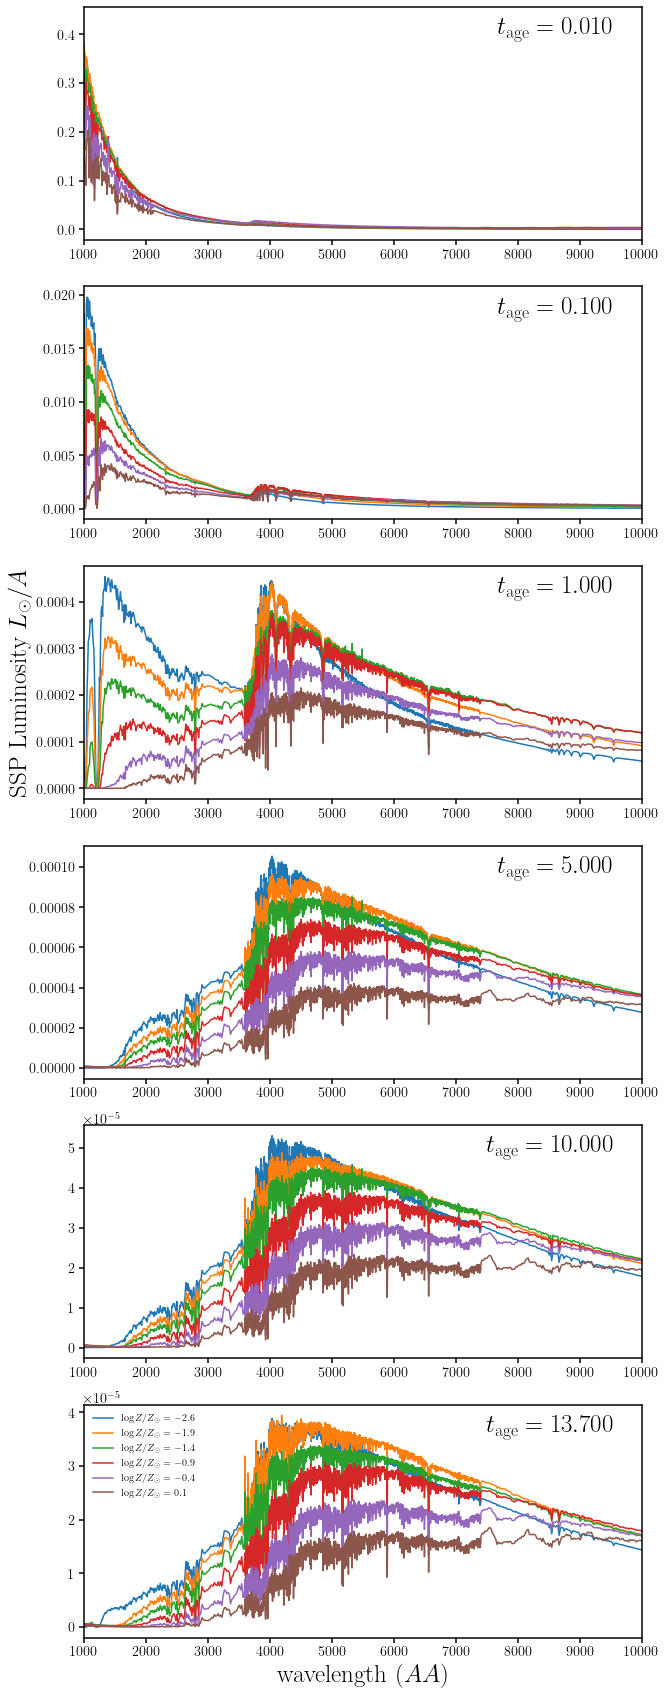

In [19]:
fig = plt.figure(figsize=(10,30))
for i, tage in enumerate([1e-2, 0.1, 1, 5, 10, 13.7]):
    sub = fig.add_subplot(6,1,i+1)
    for Z in zlegend[::2]:
        ssp.params['logzsol'] = np.log10(Z/0.019)
        w, f = ssp.get_spectrum(tage=tage, peraa=True)
        sub.plot(w, f, label='$\log Z/Z_\odot =%.1f$' % np.log10(Z/0.0190))
    sub.text(0.95, 0.95, r'$t_{\rm age} = %.3f$' % tage, ha='right', va='top', transform=sub.transAxes, fontsize=25)
    sub.set_xlim(1e3, 1e4)
    if tage == 1.: sub.set_ylabel(r'SSP Luminosity $L_\odot/A$', fontsize=25)
sub.legend(loc='upper left', fontsize=10)    
sub.set_xlabel('wavelength ($AA$)', fontsize=25)

all stellar emission has to be some linear combination of these SSPs!